# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

###Not for Grading


####Regression using MLP with MSE Loss

The objective of this case study is to understand regression i.e., to predict the price of the house using Multilayer perceptron with Cross Entropy Loss.  The package used here is  [PyTorch](https://pytorch.org/). 

##*We will see more on PyTorch in the upcoming sessions.*

#### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1W2_CS_6_MLP_Regression" #name of the notebook

def setup():
    #ipython.magic("sx wget https://www.dropbox.com/s/vu7xkf6j3v9p5np/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
   # ipython.magic("sx unzip AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt.zip?dl=1")
    ipython.magic("sx pip install torch")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print("Please enter valid Id")
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages 

In [0]:
# Importing required Packages
import matplotlib.pyplot as plt
import numpy as np
import  torch
from torch import nn
from sklearn.preprocessing import StandardScaler

###The attributes of related House price are stored in "X" as features and the prices of the houses are stored in "y" as labels

In [0]:
X = np.array([[3, 2000, 90], [2, 800, 143], [2, 850, 167], [1, 550, 267], [4, 2000, 396]])
y =  np.array([23.0, 8, 9.0, 9.0 , 25.0])

###Standard scaling the features "X"

In [0]:

ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)
X

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.58834841,  1.20863526, -1.13296108],
       [-0.39223227, -0.6997362 , -0.64318182],
       [-0.39223227, -0.62022073, -0.42139498],
       [-1.37281295, -1.09731359,  0.50271682],
       [ 1.56892908,  1.20863526,  1.69482106]])

###Defining the model for Linear Regression with MLP using PyTorch's nn.Module

In [0]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear1 = nn.Linear(input_dim, 4)
        self.sigmoid = nn.Sigmoid()
        self.linear2 = nn.Linear(4, output_dim)
        # nn.Linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function
        #print(x.size())
        out = self.sigmoid(self.linear1(x))
        out = self.linear2(out)
        return out

input_dim = 3
output_dim = 1

###The LinearRegressionModel() is saved in model below

In [0]:
model = LinearRegressionModel(input_dim,output_dim)
criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01 #Learning Rate
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 500 #number of epochs

###Storing the losses in a list for the prescribed epochs

In [0]:
losses = []
for epoch in range(epochs):
#increase the number of epochs by 1 every time
    epoch +=1
    inputs = torch.from_numpy(X.astype(np.float32))
    labels = torch.from_numpy(y.astype(np.float32))
    #clear grads as discussed in prev post
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model.forward(inputs)
    #print('outputs: ', outputs.size())
    #print('labels: ', labels.size())
    loss = criterion(outputs, labels.unsqueeze(1))
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.item()))
    losses.append(loss.item())
    if (epoch-1)%5 == 0:
        for i in model.parameters():
            print(i)

epoch 1, loss 270.5562438964844
Parameter containing:
tensor([[-0.5207, -0.1809, -0.3724],
        [ 0.2014, -0.4952,  0.1644],
        [-0.5724, -0.5533, -0.4923],
        [-0.3977, -0.1508,  0.5466]], requires_grad=True)
Parameter containing:
tensor([ 0.1835, -0.3697,  0.1594, -0.5372], requires_grad=True)
Parameter containing:
tensor([[ 0.1821,  0.6076, -0.0767,  0.1073]], requires_grad=True)
Parameter containing:
tensor([0.3556], requires_grad=True)
epoch 2, loss 256.47845458984375
epoch 3, loss 243.30499267578125
epoch 4, loss 230.87454223632812
epoch 5, loss 219.05223083496094
epoch 6, loss 207.72604370117188
Parameter containing:
tensor([[-0.4696, -0.1162, -0.3762],
        [ 0.3331, -0.3589,  0.2289],
        [-0.5610, -0.5356, -0.5015],
        [-0.3546, -0.1103,  0.5779]], requires_grad=True)
Parameter containing:
tensor([ 0.2976, -0.1197,  0.1909, -0.4588], requires_grad=True)
Parameter containing:
tensor([[0.7864, 1.1450, 0.4620, 0.5614]], requires_grad=True)
Parameter cont

###Plotting the Loss vs Epochs graph

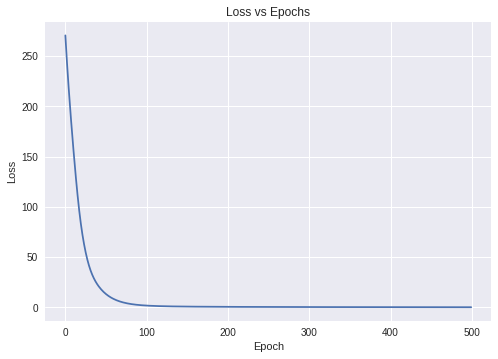

In [0]:
#Plotting Loss vs Epochs
fig,ax = plt.subplots(1)
plt.title('Loss vs Epochs')
ax.plot(losses)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.savefig('Loss_vs_Epoch.png')